# Bazele PyTorch

Bibliografie:
1. Deep Learning with PyTorch, Eli Stevens, Luca Antiga, Thomas Viehmann, Manning; 1st edition (August 4, 2020)
1. PyTorch Pocket Reference: Building and Deploying Deep Learning Models, by Joe Papa, O'Reilly Media; 1st edition (June 1, 2021)

Pytorch este un framework open source folosit pentru deep learning. Este disponibil la [https://pytorch.org/](https://pytorch.org/). Poate folosi placa grafica (NVIDIA, AMD), procesor, Tensor Processing Units ([TPUs](https://machine-learning.paperspace.com/wiki/tensor-processing-unit-tpu)). Se poate face antrenare distribuita (de exemplu, folosind placi grafice instalate pe mai multe calculatoare legate in retea). 

## Instalare

Instalarea se face conform instructiunilor de la [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/), de exemplu:

```
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```
sau
```
pip install torch torchvision torchaudio
```
sau
```
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
```
primele doua fiind cu instalare doar pentru pentru CPU, iar ultima foloseste CUDA, daca placa grafica NVIDIA este disponibila.

Alternativ, se poate folosi [Google colab](https://colab.research.google.com/).

## Tensori in PyTorch

Un tensor este un tablou de date multimensional. Orice tensor are un numar de dimensiuni. Astfel, 
* un numar este un tensor de dimensiune 0
* un vector este un tensor de dimensiune 1
* o matrice e tensor de dimensiune 2
![Tensori](./images/0-2d_tensors.png "Tensori 0-2d")
[Sursa](https://www.tensorflow.org/guide/tensor)
* avem tensori de dimensiuni 3: matrice stivuite
![Tensori](./images/3dtensors.png "Tensori 3d")
[Sursa](https://www.tensorflow.org/guide/tensor)
* Tensori cu mai mult de 3 dimensiuni 
![Tensori](./images/tensors.png "Tensori")
[Sursa](https://medium.com/@anoorasfatima/10-most-common-maths-operation-with-pytorchs-tensor-70a491d8cafd)

Modul de utilizare este destul de similar cu cel de la NumPy. 

In [2]:
import torch
print(f'Versiune torch: {torch.__version__}')

Versiune torch: 2.0.0+cu118


Putem vedea daca suportul de CUDA este disponibil. Daca da, inseamna ca se pot face operatii (calcule, antrenari de retele neurale) folosind placa grafica.

In [3]:
torch.cuda.is_available()

True

### Scalari ca tensori

In [4]:
scalar = torch.tensor(5)
type(scalar)

torch.Tensor

In [5]:
# valoarea variabilei
scalar
# observamm ca rezvultatul este obiect "tensor", ca la tipul de mai sus

tensor(5)

In [6]:
# daca se stie ca tensorul are o valoare, atunci aceasta se acceseaza cu metoda item()
scalar.item()

5

In [7]:
# numarul de dimensiuni al unui tensor scalar
scalar.ndim

0

### Vector ca tensor 

In [8]:
vector = torch.tensor([1, 20, -3, 4.5, -3])
vector

tensor([ 1.0000, 20.0000, -3.0000,  4.5000, -3.0000])

In [9]:
# avem tot tipul tensor pentru aceasta variabila
type(vector)

torch.Tensor

In [10]:
# numarul de dimensiuni este 1
vector.ndim

1

In [11]:
# un concept important pentru un tensor este "forma" sa: numarul de elemente pe fiecare dimensiune
vector.shape

torch.Size([5])

In [12]:
# indicii functioneaza ca la vectorii NumPy; componentele individuale sunt tensori
vector[1]

tensor(20.)

In [13]:
# slicing pe tensori 1d functioneaza cu aceleasi conventii ca la NumPy
vector[2:4]

tensor([-3.0000,  4.5000])

In [14]:
# operatii pe tensori
print('Suma dintre un vector si o constanta', vector + 100)

Suma dintre un vector si o constanta tensor([101.0000, 120.0000,  97.0000, 104.5000,  97.0000])


In [15]:
# inmultirea unui tensor cu o constanta
vector*(-2)

tensor([ -2., -40.,   6.,  -9.,   6.])

In [16]:
# suma a doi tensori
vector + 2 * vector

tensor([ 3.0000, 60.0000, -9.0000, 13.5000, -9.0000])

In [17]:
# produsul scalar al doi tensori
torch.dot(vector, vector)

tensor(439.2500)

In [18]:
# norma unui tensor
torch.norm(vector)

tensor(20.9583)

In [19]:
# pe tensor: minim, media, prima pozitie a minimului
torch.min(vector), vector.max(), torch.argmin(vector)

(tensor(-3.), tensor(20.), tensor(2))

Dupa cum se observa, operatiile cunoscute din NumPy se regasesc si aici. Diferenta principala este ca rezultatul unei operatii este de regula un tensor. 

Conversia de la tensor la tablou NumPy se face cu:

In [20]:
numpy_vector = vector.numpy()
print(f'tip: {type(numpy_vector)}')
print(f'valoare: {numpy_vector}')

tip: <class 'numpy.ndarray'>
valoare: [ 1.  20.  -3.   4.5 -3. ]


Un tensor este prelucrabil de catre un anumit dispozitiv (CPU, GPU, TPU etc.). Implicit acest dispozitiv este CPU:

In [21]:
vector.device

device(type='cpu')

Trecerea unui tensor pe alt dispozitiv se face in mod explicit. De exemplu, pentru a trece vector pe GPU (presupunand ca este prezenta o placa grafica pe sistem si ca instalarea de Pytorch s-a facut cu versiune de GPU) operam astfel:

In [22]:
# instructiunea de mai jos va da eroare daca nu este disponibil cuda
vector = vector.cuda()
vector.device
# ar trebui sa se afiseze: device(type='cuda', index=0)
# index=0 se refera la a cata placa video este folosita pentru procesarea tensorului

device(type='cuda', index=0)

Operatiile se pot face doar cu tensori procesati de acelasi dispozitiv. 

In [23]:
vector2 = torch.from_numpy(numpy_vector)
vector.device, vector2.device

(device(type='cuda', index=0), device(type='cpu'))

In [24]:
# executia liniei de mai jos produce eroare:
# s = vector + vector2
# RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

"Trecerea" unui tensor de pe CUDA pe CPU se face cu: 

In [25]:
vector = vector.cpu()
vector.device

device(type='cpu')

### Matrice ca tensori

In [26]:
matrix = torch.tensor([[4, 5, 6],[10, 11, 12]])

In [27]:
# matrix e tot de tip tensor
type(matrix)

torch.Tensor

In [28]:
# numarul de dimensiuni si forma
print(f'Numarul de dimensiuni: {matrix.ndim}')
print(f'Forma: {matrix.shape}')

Numarul de dimensiuni: 2
Forma: torch.Size([2, 3])


In [29]:
# Operatie punctuala: ridicarea la putere se face pentru fiecare componenta a matricei
matrix ** 2

tensor([[ 16,  25,  36],
        [100, 121, 144]])

### Tensori cu mai mult de 2 dimensiuni

In [31]:
tensor3d = torch.tensor([[
    [20,-6, 3,5],
    [13,44,121, 199],
    [-11, -19, -20, -21]],
    
    [[11,-99,67,40],
    [22,23,24,25],
    [-100, -101, -102, -103]]]
)

In [30]:
print(f'numar de dimensiuni: {tensor3d.ndim}')
print(f'forma: {tensor3d.shape}')

numar de dimensiuni: 3
forma: torch.Size([2, 3, 4])


In [31]:
# prima matrice este cu index 0:
print(tensor3d[0, ...])

tensor([[ 20,  -6,   3,   5],
        [ 13,  44, 121, 199],
        [-11, -19, -20, -21]])


In [32]:
# mecanismul de broadcasting functioneaza dupa aceleasi principii ca in NumPy
tensor2d = torch.arange(10, 22).reshape(3, 4)
tensor3d + tensor2d

tensor([[[ 30,   5,  15,  18],
         [ 27,  59, 137, 216],
         [  7,   0,   0,   0]],

        [[ 21, -88,  79,  53],
         [ 36,  38,  40,  42],
         [-82, -82, -82, -82]]])

In [33]:
# tensor 4d
tensor4d = torch.rand(3, 4, 2, 7)
print(f'numarul de dimensiuni ale lui tensor4d: {tensor4d.ndim}')
print(f'forma lui tensor4d: {tensor4d.shape}')

numarul de dimensiuni ale lui tensor4d: 4
forma lui tensor4d: torch.Size([3, 4, 2, 7])


In [34]:
# tensor plin cu 0
tensor0 = torch.zeros(3, 4)
tensor0_4d = torch.zeros_like(tensor4d)

### Transformare de imagine in tensor

O imagine color este un tensor tridimensional. Dupa citire, se poate transforma intr-un tensor Pytorch.

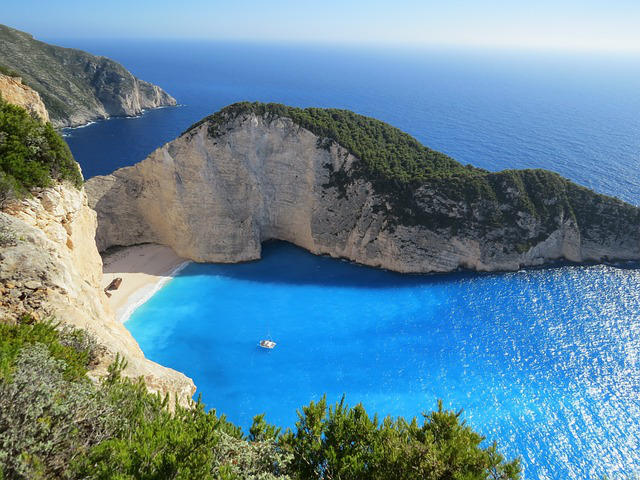

In [35]:
# daca e necesar, pentru PIL
#!pip install pillow
from PIL import Image
import numpy as np
image = Image.open('./images/beach.jpg')
display(image)

Se poate obtine un tablou NumPy din imagine:

In [36]:
image_numpy = np.array(image)
print(image_numpy.shape)

(480, 640, 3)


Valorile minime si maxime din imagine sunt:

In [37]:
np.min(image_numpy), np.max(image_numpy)

(0, 255)

Dorim sa transformam imaginea intr-un tensor Pytorch. In plus, deoarece valorile mari ale pixelilor (0..255) nu sunt potrivite pentru calculele de inmultire si adunare cu ponderi, se prefera scalarea lor la intervalul $[0, 1]$ sau standardizarea lor (valoarile pe fiecare canal să fie cu medie si deviatie standard 1).

Mai jos se face simultan conversia la tensor si scalare. Se observa si schimbarea formei tabloului: in numpy are forma (480, 640, 3), in Pytorch capata  forma (3, 480, 640) - numarul de canale da prima dimensiune.

In [38]:
import torchvision.transforms as transforms

transform = transforms.ToTensor()
image_tensor = transform(image)
print(image_tensor.shape)

torch.Size([3, 480, 640])


In [39]:
print(image_tensor)

tensor([[[0.4745, 0.4745, 0.4745,  ..., 0.7608, 0.7608, 0.7608],
         [0.4784, 0.4784, 0.4784,  ..., 0.7647, 0.7647, 0.7647],
         [0.4824, 0.4824, 0.4824,  ..., 0.7647, 0.7647, 0.7647],
         ...,
         [0.2863, 0.2706, 0.2118,  ..., 0.8314, 0.6392, 0.8667],
         [0.2549, 0.2706, 0.3882,  ..., 0.7490, 0.6039, 0.8078],
         [0.2824, 0.3922, 0.3843,  ..., 0.7137, 0.5686, 0.7804]],

        [[0.7020, 0.7020, 0.7020,  ..., 0.8863, 0.8863, 0.8863],
         [0.7059, 0.7059, 0.7059,  ..., 0.8902, 0.8902, 0.8902],
         [0.7098, 0.7098, 0.7098,  ..., 0.8902, 0.8902, 0.8902],
         ...,
         [0.3529, 0.3333, 0.2627,  ..., 0.9333, 0.7137, 0.8902],
         [0.3216, 0.3333, 0.4353,  ..., 0.8784, 0.6863, 0.8510],
         [0.3490, 0.4549, 0.4314,  ..., 0.8667, 0.6784, 0.8353]],

        [[0.8902, 0.8902, 0.8902,  ..., 0.9686, 0.9686, 0.9686],
         [0.8941, 0.8941, 0.8941,  ..., 0.9725, 0.9725, 0.9725],
         [0.8902, 0.8902, 0.8902,  ..., 0.9725, 0.9725, 0.

In [40]:
# valoarea minima si maxima din tensor:
image_tensor.min(), image_tensor.max()

(tensor(0.), tensor(1.))

Redimensionarea imaginii se poate face tot printr-o transformare:

In [41]:
resize = transforms.Resize([224, 224], antialias=False)

In [42]:
image_resized = resize(image_tensor)
print(image_resized.shape)

torch.Size([3, 224, 224])


Cele doua transformari pot fi compuse intr-o secventa:

In [43]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize([224, 224], antialias=False)])
image_tensor_scaled_resized = transform(image)
print(image_tensor_scaled_resized.shape)

assert torch.equal(image_tensor_scaled_resized, image_resized)

torch.Size([3, 224, 224])


Pentru standardizarea imaginii trebuie sa stim media si dispersia pe fiecare canal.

In [44]:
image = Image.open('./images/beach.jpg')
transform = transforms.ToTensor()
# transformare in tensor, scalare in [0,1]
image_tensor = transform(image)
mean, std = image_tensor.mean([1,2]), image_tensor.std([1,2])
print("mean and std before scaling:")
print("Mean of the image:", mean)
print("Std of the image:", std)
# pentru ultima linie afisata: sunt deviatiile standard pentru canalele rosu, verde, respecctiv albastru

mean and std before scaling:
Mean of the image: tensor([0.3916, 0.5372, 0.6126])
Std of the image: tensor([0.2389, 0.2117, 0.3052])


In [45]:
transform_scale = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)   # scalarea este numita normalizare in Pytorch
])

image_scaled = transform_scale(image)
mean_scaled, std_scaled = image_scaled.mean([1,2]), image_scaled.std([1,2])
print("mean and std after scaling:")
print("Mean of the image:", mean_scaled)
print("Std of the image:", std_scaled)

mean and std after scaling:
Mean of the image: tensor([-9.4871e-09, -1.7573e-07, -1.5895e-09])
Std of the image: tensor([1., 1., 1.])
